<a href="https://colab.research.google.com/github/LucaLazar07/LSA-AI-ML-Internship/blob/main/Week2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

**Write a short description about the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [3]:
df_insurance = pd.read_csv("insurance.csv")
df_insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here I printed the first five rows of the dataset. As we can see, an example contains six features with the target being the charges.

In [4]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see, we have three numerical features: **age, bmi, children** and three categorical features: **sex, smoker, region**.

In [5]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


For the numerical features, we can see that the values are distributed normally as the difference between the min and 50% is almost equal to the one between 25% and 75%. We will explore this later in the data visualization.

**Task 2**

**Calculate measures of central tendency**

In [6]:
numerical_features = df_insurance.drop(columns=["charges"]).select_dtypes(include=["int64", "float64"]).columns.tolist()

for feature in numerical_features:
  print(f"Mean of feature {feature}: {np.mean(df_insurance[feature])}")
  print(f"Median of feature {feature}: {np.median(df_insurance[feature])}")
  print(f"Mode of the feature {feature}: {st.mode(df_insurance[feature])}")

Mean of feature age: 39.20702541106129
Median of feature age: 39.0
Mode of the feature age: 18
Mean of feature bmi: 30.66339686098655
Median of feature bmi: 30.4
Mode of the feature bmi: 32.3
Mean of feature children: 1.0949177877429
Median of feature children: 1.0
Mode of the feature children: 0


We observe that for the **age** feature, the **mean** and **median** are
very appropiate so both of them are relevant for this feature. This tells us that the distribution of this specific data is pretty balanced. The **mode** is 18, so this means that the most people are of age 18. Being distant from the **mean** and **median**, this measure does not help us at all.

For the **bmi** feature, the **mean** and the **median** values are separated by a few decimals so the data is not very skewed for this particular feature. The **mode** is not very different either, but is not as relevant as the other measures.

For the **children** feature, the most relevant measure is the **mode**, stating that most of the people in the dataset do not have a children. The **mean** and **median** are not so relevant as they emphasize that the average number of children is 1, but it is more important to observe that most of the people do not have one.

**Task 3**

**Create appropriate plots for numeric variables and categorical variables**

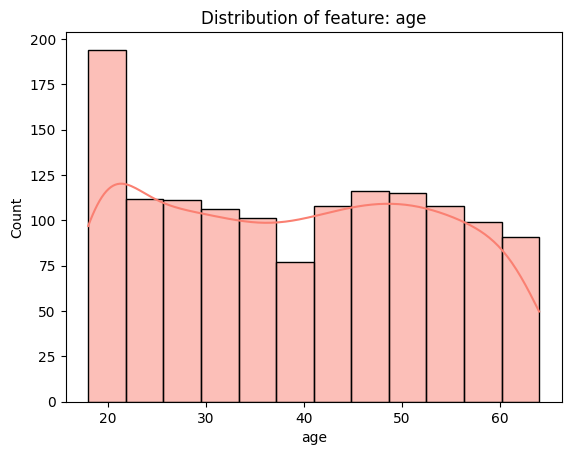

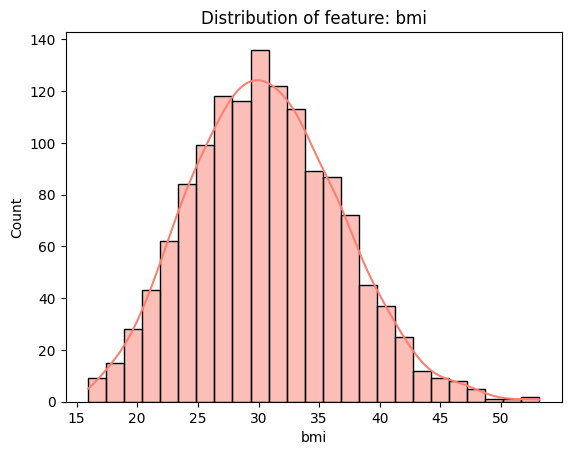

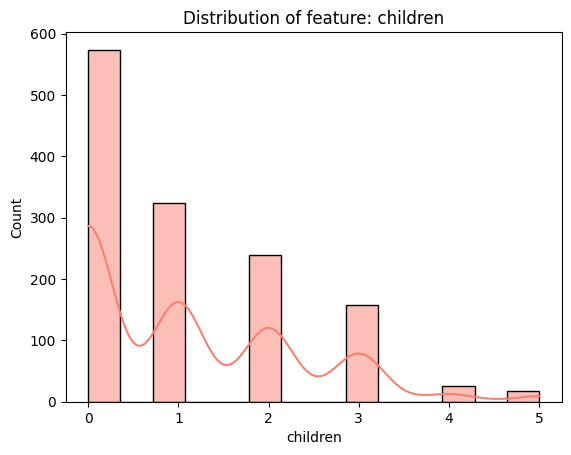

In [7]:
for feature in numerical_features:
  sns.histplot(df_insurance[feature], kde=True, color='salmon')
  plt.title(f"Distribution of feature: {feature}")
  plt.show()

The first plot shows the distribution of age amongst the customers. As we saw while computing the mode, mean and median, most of the customers are young. The plot shows us that the **mean** and **median** are indeed the right measures to consider as the plot has a normal distribution amongst the 30 to 40 range.

The second plot empphasizes a bell-shaped distribution of the bmi feature. The plot is centered around the **median** value (30), making it the most relevant measure. This tells us what is the threshold for considering the customers obese or not, making a huge impact on their charges.

The last plot shows the distribution of the children feature. As the **mode** told us, the most customers do not have a child and the number of people with a higher number of children is decreasing as the number of children is increasing.
This could make a huge impact on the charges as the families with more children should have higher ones. As most of the costumers do not have a child, we could expect high differences.

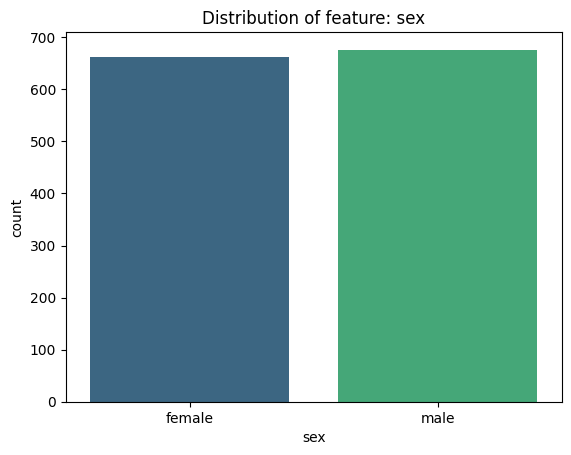

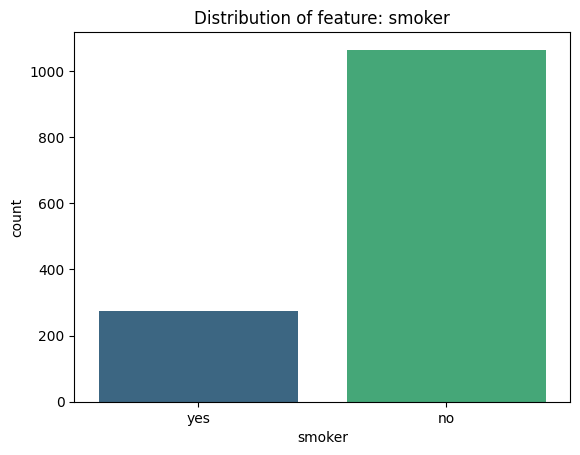

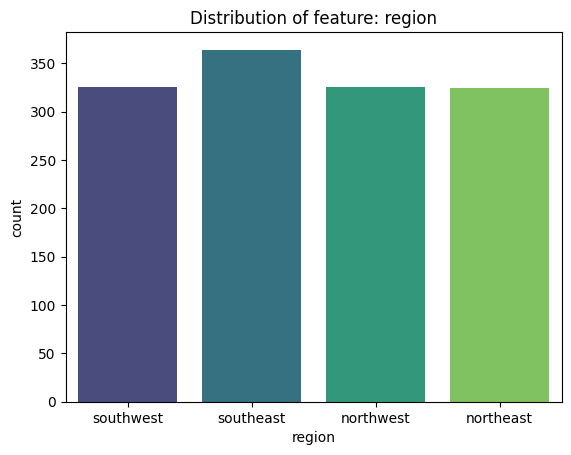

In [8]:
categorical_features = df_insurance.select_dtypes(include=["object"]).columns.tolist()
for feature in categorical_features:
  sns.countplot(data=df_insurance, x=feature, hue=feature, palette='viridis')
  plt.title(f"Distribution of feature: {feature}")
  plt.show()

The counterplots above show the distribution of the categorical features: **smoker, region and sex**. As we can see, the gender is almost equally distributed in the dataset. On the other hand, the number of smokers is significantly less than the non-smokers, while the regions are distributed normally with the southeast region dominating the dataset.

**Task 4**

**Learn about the sampling techniques, hypothesis testing, one-hot encoding**


**Stratified sampling**

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_insurance, test_size=0.2, stratify=df_insurance['smoker'])

print("Train dataset:\n", train['smoker'].value_counts())
print("Train dataset:\n", test['smoker'].value_counts())


Train dataset:
 smoker
no     851
yes    219
Name: count, dtype: int64
Train dataset:
 smoker
no     213
yes     55
Name: count, dtype: int64


**Hypothesis testing to see the difference between charges for smokers and non-smokers**

H0: Smokers and non-smokers have similar charges

H1: Smokers and non-smokers have different charges

Then, we will perform a two-tailed t-test to see how being a smoker or a non-smoker affects the charges.

In [12]:
from scipy import stats

smoker_charges = df_insurance[df_insurance['smoker'] == "yes"]["charges"]
nonsmoker_charges = df_insurance[df_insurance['smoker'] == "no"]["charges"]

_, p_value = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var=False)

alpha = 0.05 # significance level

if p_value < alpha:
  print("Null Hypothesis is false. We accept H1")
else:
  print("Alternative Hypothesis is false. We accept H0")

Null Hypothesis is false. We accept H1


As we can see, the null hypothesis is false as there is a significant difference between the charges of the smokers and non-smokers.

**One-Hot encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded_features = encoder.fit_transform(df_insurance[categorical_features])
# sparse_output=False - returns an array
# drop=first - if sex_male is 0, then the customer is female
# eliminates dummy variable trap
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
encoded_df

**Task 5**

**Answer questions about charges**

Mean of feature charges: 13270.422265141257
Median of feature charges: 9382.033
Mode of the feature charges: 1639.5631


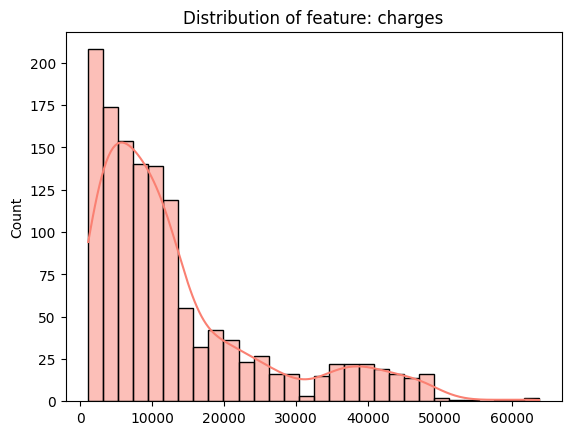

In [19]:
target = np.array(df_insurance['charges'])
print(f"Mean of feature charges: {np.mean(target)}")
print(f"Median of feature charges: {np.median(target)}")
print(f"Mode of the feature charges: {st.mode(target)}")
sns.histplot(target, kde=True, color='salmon')
plt.title(f"Distribution of feature: charges")
plt.show()

As we can see from above, the plot for the target variable **charges**, shows that most of the people have charges less than 10000, with a normal distribution
around the 9000 mark. Therefore, if asked, I would present the **median** as the typical cost of a costumer as it is more relevant than the mean which is higher due to some examples of high-value charges. If the wrong measure is used, then the insurance executive will think that most of the customers are overpaying if the mean is presented or heavily underpaying if the mode is presented

In [42]:
# Split dataset into smoker and non-smokers
df_smoker = df_insurance[df_insurance["smoker"] == "yes"]
df_nonsmoker = df_insurance[df_insurance["smoker"] == "no"]

# Compute median and mean for both groups
print(f"Mean of smokers: {np.mean(df_smoker['charges'])}")
print(f"Mean of non-smokers: {np.mean(df_nonsmoker['charges'])}")
print(f"Median of smokers: {np.median(df_smoker['charges'])}")
print(f"Median of non-smokers: {np.median(df_nonsmoker['charges'])}")

Mean of smokers: 32050.23183153284
Mean of non-smokers: 8434.268297856204
Median of smokers: 34456.348450000005
Median of smokers: 7345.4053


As we can see from above, the **mean and median** value for charges differ by a high margin between smokers and non-smokers. Therefore, being a smoker surely increases the charges per customer. The statistic that highlights better the risk difference between a smoker and a non-smoker is the mean as it emphasizes the charges per customer by choosing whether to be a smoker or not.

**Task 6**

**Build a Linear Regression model and a Decision Tree one and compare to check which is best**

**Linear Regression**

Mean absolute error: 4181.194473753651
Root mean squared error: 5796.284659276274
R-squared score: 0.7835929767120722


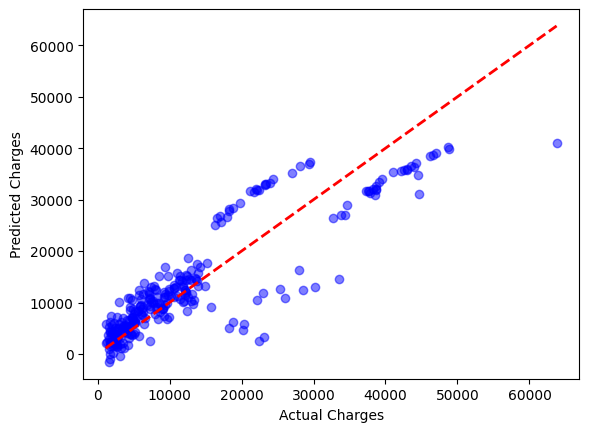

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
# I loaded the dataset at the beginning
# We have made some data analysis, computing the mean, median and mode for numerical features
# We also plotted the data distribution for every feature
# We one-hot encoded the categorical features


df = pd.concat([df_insurance.drop(categorical_features, axis=1), encoded_df], axis=1)
# df.head()

X = df.drop(columns=["charges"], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = root_mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f"Mean absolute error: {mae_lr}")
print(f"Root mean squared error: {rmse_lr}")
print(f"R-squared score: {r2_lr}")

plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

**Decision Tree**

Mean absolute error: 2578.511891228828
Root mean squared error: 4568.640158845888
R-squared score: 0.8655546315872771


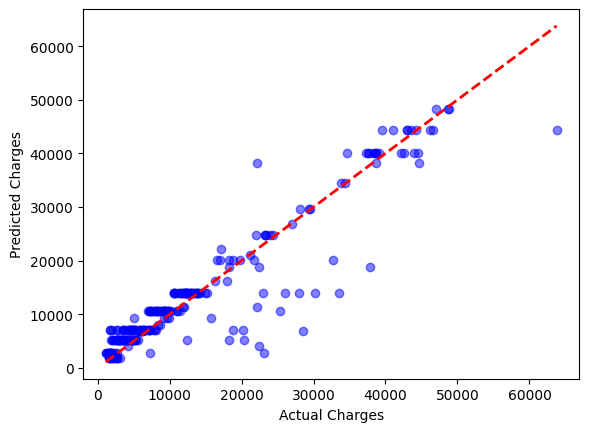

In [82]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42, max_depth=5, max_features=6)

model_dt.fit(X_train_scaled, y_train)

y_pred = model_dt.predict(X_test_scaled)

mae_dt = mean_absolute_error(y_test, y_pred)
rmse_dt = root_mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print(f"Mean absolute error: {mae_dt}")
print(f"Root mean squared error: {rmse_dt}")
print(f"R-squared score: {r2_dt}")

plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

As we can see from the plots above and from the metrics' compute, the decision Tree model does a much better job at predicting the charges, explaining 86% of the variance in the changes fluctuation.

In [93]:
results = pd.DataFrame({
    'Model': ["Linear Regression", "Decision Tree"],
    "Mean absolute error": [mae_lr, mae_dt],
    "Root mean squared error": [rmse_lr, rmse_dt],
    "R-squared score": [r2_lr, r2_dt]
})
results

,Model,Mean absolute error,Root mean squared error,R-squared score
0,Linear Regression,4181.194474,5796.284659,0.783593
1,Decision Tree,2578.511891,4568.640159,0.865555
